In [5]:
# 전처리 완료 데이터 가져오기 
raw_data = pd.read_csv('../1. raw_data/raw_data.csv', index_col=0)

In [6]:
raw_data.head()

,연,월,일,시간대,요일,기온,강수량,풍속,습도,적설량,미세먼지,초미세먼지,공휴일,통화건수
0,2016,19.4,1,0,73,NaN,0.0,NaN,NaN,0.0,48.0,26.0,0,67.0
1,2016,10.0,1,1,토,18.8,0.0,1.3,77.0,0.0,48.0,26.0,0,27.0
2,2016,10.0,1,2,토,18.5,0.0,0.4,78.0,0.0,48.0,26.0,0,16.0
3,2016,10.0,1,3,토,18.3,0.0,0.4,79.0,0.0,48.0,26.0,0,10.0
4,2016,10.0,1,4,토,18.1,0.0,1.3,81.0,0.0,48.0,26.0,0,18.0


In [7]:
# '월' 카테고리 이상치 데이터 제거 
dum = raw_data['월'].value_counts()
dum

7.0     2232
5.0     2232
8.0     2232
3.0     2232
1.0     2232
12.0    2232
10.0    2228
6.0     2160
4.0     2160
11.0    2159
9.0     2159
2.0     2016
13.3       3
19.4       1
5.5        1
29.2       1
Name: 월, dtype: int64

In [8]:
dum1 = raw_data['월'] == 13.3
dum1 = raw_data[dum1].index
raw_data = raw_data.drop(dum1, axis=0)

In [9]:
dum1 = raw_data['월'] == 19.4
dum1 = raw_data[dum1].index
raw_data = raw_data.drop(dum1, axis=0)

In [10]:
dum1 = raw_data['월'] == 29.2
dum1 = raw_data[dum1].index
raw_data = raw_data.drop(dum1, axis=0)

In [11]:
dum1 = raw_data['월'] == 5.5
dum1 = raw_data[dum1].index
raw_data = raw_data.drop(dum1, axis=0)

In [12]:
dum = raw_data['월'].value_counts()
dum

7.0     2232
5.0     2232
8.0     2232
3.0     2232
1.0     2232
12.0    2232
10.0    2228
6.0     2160
4.0     2160
11.0    2159
9.0     2159
2.0     2016
Name: 월, dtype: int64

In [13]:
# '풍속' 결측 데이터 제거 
mean_wind = raw_data['풍속'].mean(axis=0)
raw_data['풍속'].fillna(method='bfill',inplace=True) #bfill > 뒤에 있는 값을 가져옴 ; 이후 시간대의 풍속과 비슷할것으로 판단함 
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26274 entries, 1 to 26279
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연       26274 non-null  int64  
 1   월       26274 non-null  float64
 2   일       26274 non-null  int64  
 3   시간대     26274 non-null  int64  
 4   요일      26274 non-null  object 
 5   기온      26274 non-null  float64
 6   강수량     26274 non-null  float64
 7   풍속      26274 non-null  float64
 8   습도      26274 non-null  float64
 9   적설량     26274 non-null  float64
 10  미세먼지    26274 non-null  float64
 11  초미세먼지   26274 non-null  float64
 12  공휴일     26274 non-null  int64  
 13  통화건수    26274 non-null  float64
dtypes: float64(9), int64(4), object(1)
memory usage: 3.0+ MB


In [14]:
raw_data

,연,월,일,시간대,요일,기온,강수량,풍속,습도,적설량,미세먼지,초미세먼지,공휴일,통화건수
1,2016,10.0,1,1,토,18.8,0.0,1.3,77.0,0.0,48.0,26.0,0,27.0
2,2016,10.0,1,2,토,18.5,0.0,0.4,78.0,0.0,48.0,26.0,0,16.0
3,2016,10.0,1,3,토,18.3,0.0,0.4,79.0,0.0,48.0,26.0,0,10.0
4,2016,10.0,1,4,토,18.1,0.0,1.3,81.0,0.0,48.0,26.0,0,18.0
5,2016,10.0,1,5,토,17.8,0.0,0.7,83.0,0.0,48.0,26.0,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26275,2019,9.0,30,19,월,24.4,0.0,2.1,67.0,0.0,51.0,30.0,0,74.0
26276,2019,9.0,30,20,월,23.1,0.0,1.8,72.0,0.0,51.0,30.0,0,65.0
26277,2019,9.0,30,21,월,22.5,0.0,1.0,69.0,0.0,51.0,30.0,0,73.0
26278,2019,9.0,30,22,월,21.8,0.0,0.5,75.0,0.0,51.0,30.0,0,38.0


In [15]:
import pickle
with open('raw_data.pkl', 'wb') as file:
    pickle.dump(raw_data,file)

In [17]:
# ['연', '월', '일', '시간대', '요일', '공휴일'] 인코딩

df = pd.get_dummies(raw_data, columns=['연', '월', '일', '시간대', '요일', '공휴일'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26274 entries, 1 to 26279
Data columns (total 89 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   기온      26274 non-null  float64
 1   강수량     26274 non-null  float64
 2   풍속      26274 non-null  float64
 3   습도      26274 non-null  float64
 4   적설량     26274 non-null  float64
 5   미세먼지    26274 non-null  float64
 6   초미세먼지   26274 non-null  float64
 7   통화건수    26274 non-null  float64
 8   연_2016  26274 non-null  uint8  
 9   연_2017  26274 non-null  uint8  
 10  연_2018  26274 non-null  uint8  
 11  연_2019  26274 non-null  uint8  
 12  월_1.0   26274 non-null  uint8  
 13  월_2.0   26274 non-null  uint8  
 14  월_3.0   26274 non-null  uint8  
 15  월_4.0   26274 non-null  uint8  
 16  월_5.0   26274 non-null  uint8  
 17  월_6.0   26274 non-null  uint8  
 18  월_7.0   26274 non-null  uint8  
 19  월_8.0   26274 non-null  uint8  
 20  월_9.0   26274 non-null  uint8  
 21  월_10.0  26274 non-null  uint8  
 22

In [18]:
y_target = df['통화건수']
X_features = df.drop('통화건수',axis=1)

In [19]:
# 데이터 분리 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X_features,y_target, test_size= 0.3, random_state=13)

lr_reg= LinearRegression()
lr_reg.fit(X_train,y_train)

# 모델 예측 
pred = lr_reg.predict(X_test)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
print(rmse, mse)

18.822938551896478 354.3030157284706


In [43]:
# RMSE/MAE/r2 성능 확인 함수 

def evaluation_lin(y_test, pred, df):
    y_target = df['통화건수']
    X_features = df.drop('통화건수',axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X_features,y_target, test_size= 0.3, random_state=13)

    lr_reg= LinearRegression()
    lr_reg.fit(X_train,y_train)

    pred = lr_reg.predict(X_test)
    
    mse = mean_squared_error(y_test, pred)
    rmse_val = np.sqrt(mse)
    mae_val = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)

    print('RMSE : {} | MAE : {} | r2 : {} '.format(round(rmse_val,2),round(mae_val,2),round(r2,3)))

In [44]:
evaluation_lin(y_test, pred, df)

RMSE : 18.82 | MAE : 12.12 | r2 : 0.866 


In [37]:
# kfold 선형회귀 평가 
lin_scores = cross_val_score(lr_reg, X_features,y_target, scoring = "neg_mean_squared_error", cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)

display_socres(lin_rmse_scores)

############# 재검증 필요함 ###############

점수: [3.42765907e+11 1.74566260e+01 2.19200471e+01 1.88697348e+01
 1.92715960e+01]
평균: 68553181431.220924
표준편차: 137106362823.68285


# target : 통화건수의 왜곡 분포 log화 
- 정규분포의 형태로 log 처리하여 왜곡도 낮춤 

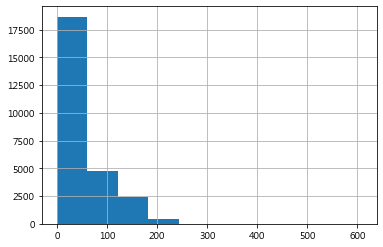

In [45]:
y_target.hist() #분포도 확인 

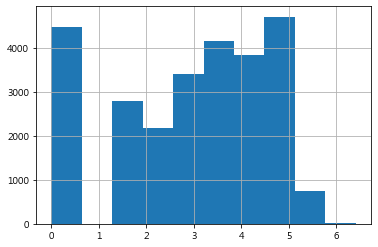

In [46]:
y_target_log = np.log1p(y_target)
y_target_log.hist() #정규분포의 형태는 아니지만 왜곡도를 낮춤 

In [53]:
# log 변환
y_target_log = np.log1p(y_target)

# data set 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target_log, test_size=0.3, random_state=13)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
pred = lr_reg.predict(X_test)
y_test_exp = np.expm1(y_test)  #로그 처리를 원래 스케일로 변환 
pred_exp = np.expm1(pred)

mse = mean_squared_error(y_test_exp, pred_exp)
rmse_val = np.sqrt(mse)
mae_val = mean_absolute_error(y_test_exp, pred_exp)
r2 = r2_score(y_test_exp, pred_exp)

print('RMSE : {} | MAE : {} | r2 : {} '.format(round(rmse_val,2),round(mae_val,2),round(r2,3)))

RMSE : 16.45 | MAE : 8.93 | r2 : 0.898 


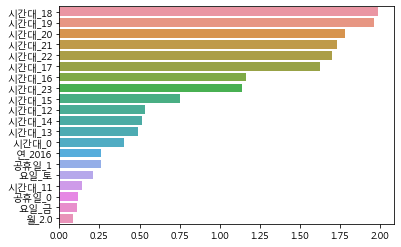

In [48]:
# 회귀 계수 확인하여 이상치 제거 
import matplotlib.pyplot as plt 
import matplotlib as mpl
import matplotlib.font_manager as fm
%matplotlib inline
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns 

coef =pd.Series(lr_reg.coef_, index=X_features.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y= coef_sort.index)

#저녁 시간대에 많은 영향을 받음을 알 수 있음 

# 회귀계수 상위 6개에 대한 이상치 제거 

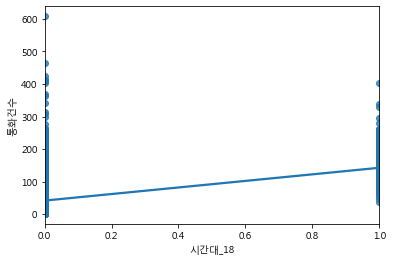

In [49]:
sns.regplot(x=X_features['시간대_18'], y=y_target, data =df )

In [54]:
# 이상치 제거 
cond1=df['시간대_18'] == 1 
cond2= df['통화건수'] > 400 
outlier_index = df[cond1&cond2].index
df_test = df.drop(outlier_index,axis=0)

# 성능 평가 

# y_target = df_test['통화건수']
# X_features = df_test.drop('통화건수',axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X_features,y_target, test_size= 0.3, random_state=13)

# lr_reg= LinearRegression()
# lr_reg.fit(X_train,y_train)

# # 모델 예측 
# pred = lr_reg.predict(X_test)

evaluation_lin(y_test, pred, df_test)

#################이상치 제거 후 성능저하#####################
#################추가회귀계수 이상치 제거안함#####################

RMSE : 19.41 | MAE : 12.06 | r2 : 0.86 


In [51]:
#-------------- Decsion Tree를 활용한 회귀모델 --------------
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split


tree_reg = DecisionTreeRegressor(random_state=13)
tree_reg.fit(X_train, y_train)

# DT_reg 모델 성능 
pred= tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, pred)
tree_rmse = np.sqrt(tree_mse)
print("tree_rmse: ", tree_rmse)
print("r2_score: ", r2_score(y_test, pred))

tree_rmse:  0.7409544251138744
r2_score:  0.7945816447719882


In [52]:
# <<DTREE>> k-fold 교차검증준비 
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_features,y_target, scoring = "neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

In [35]:
def display_socres(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차:", scores.std())
    
display_socres(tree_rmse_scores)

점수: [25.31785003 21.73127112 24.53587443 22.09671243 20.7722528 ]
평균: 22.890792163203766
표준편차: 1.7355210301544668


In [39]:
#--------------RFOREST를 활용한 회귀모델 --------------
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=50,random_state=13)
forest_reg.fit(X_train, y_train)
pred= forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, pred)
forest_rmse = np.sqrt(forest_mse)
print("tree_rmse: ", forest_rmse)
print("r2_score: ", r2_score(y_test, pred))

tree_rmse:  0.5434156790320627
r2_score:  0.8895106076561171


In [42]:
# <<<random forest>>> kfold 확인
for_scores = cross_val_score(forest_reg, X_features, y_target, scoring = "neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-for_scores)

display_socres(forest_rmse_scores)

점수: [18.44977712 15.52387411 22.17461969 18.95027853 15.54235737]
평균: 18.12818136488469
표준편차: 2.474745754079164
